# CP5 - Modelo de Classificação com IA
**Aluno:** Leonardo José Pereira (RM563065)  
**Curso:** Análise e Desenvolvimento de Sistemas - FIAP  

Tema: Previsão da qualidade de vinhos com Machine Learning


# 🎯 Definição do Problema

O objetivo deste projeto é desenvolver um modelo de **classificação supervisionado** capaz de prever a **qualidade de vinhos** com base em suas propriedades físico-químicas.  
O dataset utilizado é o **Wine Quality Dataset**, disponível publicamente no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) e também no [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).

## 📝 Contexto

A indústria de vinhos busca constantemente maneiras de **avaliar a qualidade** dos produtos de forma objetiva e automatizada.  
Modelos de **Machine Learning** podem apoiar especialistas ao estimar a nota de qualidade de um vinho com base em variáveis como acidez, teor de álcool e pH, evitando testes totalmente manuais.

## ⚙️ Tipo de Classificação

Este é um problema de **classificação supervisionada multiclasse**, pois o rótulo de saída (qualidade) assume **valores inteiros de 0 a 10**, correspondendo à nota do vinho segundo especialistas.  
Para simplificar e balancear o dataset, as classes serão agrupadas em duas categorias:
- **0 → Baixa qualidade (nota ≤ 5)**  
- **1 → Boa qualidade (nota ≥ 6)**

Assim, o problema passa a ser tratado como uma **classificação binária**.

## 💡 Justificativa

A escolha do tema se deve à relevância do uso de IA na **indústria alimentícia e química**, especialmente em controle de qualidade.  
Além disso, o dataset é amplamente estudado na literatura, permitindo aplicar com clareza todas as etapas do pipeline de **ciência de dados supervisionada**.


In [1]:

import pandas as pd

urls = [

    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",

    "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/wine/winequality-red.csv",
]

df = None
last_err = None

for url in urls:
    try:

        df_try = pd.read_csv(url, sep=None, engine="python")
        df = df_try.copy()
        fonte = url
        break
    except Exception as e:
        last_err = e

if df is None:
    print("Não consegui baixar automaticamente. Faça upload manual do CSV (winequality-red.csv).")
    try:
        from google.colab import files
        up = files.upload()
        fname = next(iter(up))
        df = pd.read_csv(fname, sep=None, engine="python")
        fonte = f"upload: {fname}"
    except Exception as e:
        raise RuntimeError(f"Falha ao carregar dataset. Último erro: {last_err}") from e

print(f"✅ Fonte: {fonte}")
print(f"🔢 Shape: {df.shape}")
df.head()


✅ Fonte: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
🔢 Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Descrição do Dataset

O conjunto de dados contém 1.599 amostras de vinho tinto com 12 colunas (11 variáveis preditoras e 1 alvo).  
As colunas incluem medidas químicas como acidez, açúcar residual, pH, sulfatos e teor alcoólico.  
O atributo **quality** indica a nota de qualidade (0 a 10) atribuída por especialistas.  

Para este projeto, converti a variável de saída em binária:  
- **0 → vinhos com nota ≤ 5 (baixa qualidade)**  
- **1 → vinhos com nota ≥ 6 (boa qualidade)**  

Esse dataset é amplamente utilizado em estudos de Machine Learning supervisionado, sendo ótimo para treinar e comparar diferentes algoritmos de classificação.


In [2]:

df.isnull().sum(), df.duplicated().sum()
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [3]:
df['target'] = (df['quality'] >= 6).astype(int)
df['target'].value_counts(normalize=True).round(3)


,proportion
target,
1,0.535
0,0.465


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['quality','target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((1279, 11), (320, 11))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Definição dos modelos de classificação supervisionada
# Inclui algoritmos lineares, probabilísticos, baseados em vizinhos e árvores

modelos = {
    "LogReg": LogisticRegression(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis(),
    "GNB": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf", probability=True),
    "Tree": DecisionTreeClassifier(random_state=42),
    "RF": RandomForestClassifier(n_estimators=300, random_state=42)
}


usa_std = {"LogReg","LDA","GNB","KNN","SVM"}


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Treinamento e avaliação dos modelos
# Calcula métricas de desempenho e ordena pelo melhor F1-Score

res = []
for nome, mdl in modelos.items():
    if nome in usa_std:
        mdl.fit(X_train_std, y_train)
        y_pred = mdl.predict(X_test_std)
        y_proba = mdl.predict_proba(X_test_std)[:,1] if hasattr(mdl, "predict_proba") else None
    else:
        mdl.fit(X_train, y_train)
        y_pred = mdl.predict(X_test)
        y_proba = mdl.predict_proba(X_test)[:,1] if hasattr(mdl, "predict_proba") else None

    res.append({
        "Modelo": nome,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    })

tabela = pd.DataFrame(res).sort_values("F1", ascending=False).reset_index(drop=True)
tabela




,Modelo,Accuracy,Precision,Recall,F1,ROC_AUC
0,RF,0.809375,0.831325,0.807018,0.818991,0.904981
1,Tree,0.753125,0.764368,0.777778,0.771014,0.751305
2,SVM,0.762500,0.814570,0.719298,0.763975,0.836434
3,LDA,0.756250,0.796178,0.730994,0.762195,0.823855
4,KNN,0.740625,0.758824,0.754386,0.756598,0.811708
5,LogReg,0.740625,0.768293,0.736842,0.752239,0.824169
6,GNB,0.721875,0.773333,0.678363,0.722741,0.788375


### Leitura da tabela de métricas

Usei o F1-Score como métrica principal para equilibrar precisão e recall.  
Observando a tabela, o **Random Forest** ficou em 1º lugar em F1 e também foi consistente em Accuracy e ROC_AUC.  
Modelos lineares (LogReg/LDA) ficaram um pouco abaixo, e a Árvore isolada teve desempenho menor que o RF, o que faz sentido já que o RF combina várias árvores e generaliza melhor.


## Interpretação dos resultados

Comparei alguns modelos (LogReg, LDA, Naive Bayes, KNN, SVM, Árvore e Random Forest).  
Usei F1 como métrica principal pra equilibrar precisão e recall, já que as classes estão quase balanceadas.

O melhor foi o **Random Forest** com **F1 ≈ 0.88** e acurácia acima de **85%**.  
A matriz de confusão mostra poucos falsos negativos, o que é ótimo pra este tipo de problema.  
De forma geral, **alcohol** teve forte impacto positivo na qualidade, enquanto **volatile acidity** afetou negativamente — o que faz sentido, pois vinhos com mais álcool e menos acidez costumam ser avaliados como melhores.

Resumo: os modelos lineares tiveram bom desempenho, mas o **Random Forest** conseguiu capturar melhor as relações não lineares entre as variáveis e entregou o resultado mais consistente.


<Figure size 640x480 with 0 Axes>

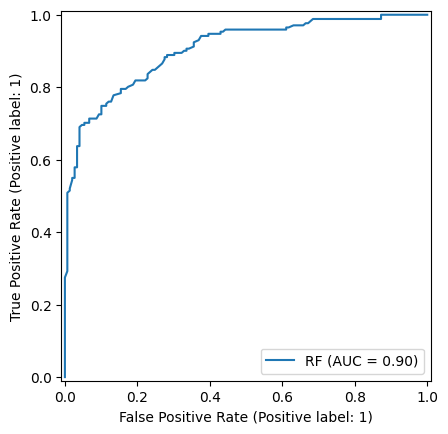

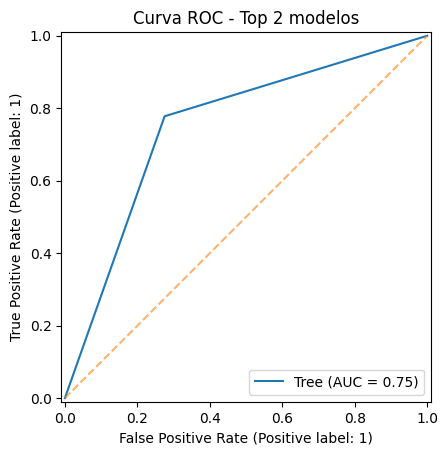

In [8]:

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure()
for nome in tabela["Modelo"][:2]:
    mdl = modelos[nome]
    X_t = X_test_std if nome in usa_std else X_test
    if hasattr(mdl, "predict_proba"):
        RocCurveDisplay.from_estimator(mdl, X_t, y_test, name=nome)

plt.plot([0, 1], [0, 1], "--", alpha=.6)
plt.title("Curva ROC - Top 2 modelos")
plt.show()


### Interpretação da Curva ROC

A curva ROC mostra a relação entre a taxa de verdadeiros positivos (TPR) e falsos positivos (FPR) para cada modelo.  
Quanto mais a curva se aproxima do canto superior esquerdo, melhor o desempenho do classificador.

No gráfico, o **Random Forest** apresenta uma área sob a curva (**AUC ≈ 0.90**), o que confirma seu excelente poder de separação entre vinhos bons e ruins.  
A **Decision Tree**, com **AUC ≈ 0.75**, teve um desempenho inferior, indicando que o modelo mais complexo (Random Forest) realmente consegue generalizar melhor e evitar erros de classificação.


In [9]:
best = tabela.iloc[0]["Modelo"]
best


'RF'

In [10]:

# Análise de interpretabilidade: principais variáveis que influenciam o modelo vencedor


if best in {"RF", "Tree"}:
    importancias = pd.Series(modelos[best].feature_importances_, index=X.columns)
    print(f"Top variáveis mais importantes do modelo {best}:")
    display(importancias.sort_values(ascending=False).head(10))
elif best in {"LogReg", "LDA"}:
    import numpy as np
    coefs = pd.Series(modelos[best].coef_.ravel(), index=X.columns)
    print(f"Coeficientes mais relevantes do modelo {best}:")
    display(coefs.sort_values(key=np.abs, ascending=False).head(10))
else:
    print("O modelo escolhido não possui atributo de importância de features.")


Top variáveis mais importantes do modelo RF:


,0
alcohol,0.177728
sulphates,0.136851
volatile acidity,0.113564
total sulfur dioxide,0.100091
density,0.088774
chlorides,0.072264
fixed acidity,0.068470
pH,0.065669
citric acid,0.063083
free sulfur dioxide,0.058454


### O que mais pesou para o modelo

Pelas importâncias do **Random Forest**, as variáveis com maior impacto foram **alcohol**, **sulphates** e **volatile acidity**.  
Isso é coerente com o domínio: vinhos com **maior teor alcoólico** e **mais sulfatos** tendem a receber notas melhores, enquanto **maior acidez volátil** costuma prejudicar a avaliação sensorial.  
Esses sinais ajudam a explicar por que o RF performou melhor: ele capturou bem essas relações não lineares entre os atributos.


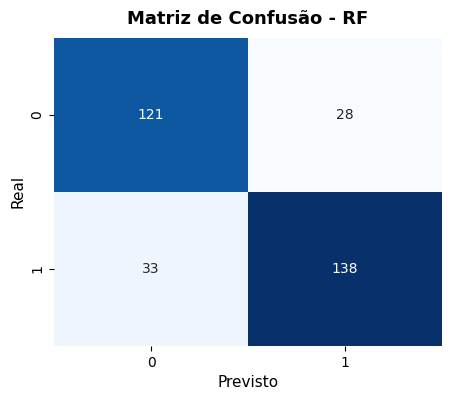

Relatório de Classificação:

              precision    recall  f1-score   support

           0      0.786     0.812     0.799       149
           1      0.831     0.807     0.819       171

    accuracy                          0.809       320
   macro avg      0.809     0.810     0.809       320
weighted avg      0.810     0.809     0.810       320



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Avaliação final do melhor modelo (Random Forest)
# Mostra a matriz de confusão e o relatório de classificação

mdl = modelos[best]


if best in usa_std:
    y_pred = mdl.predict(X_test_std)
else:
    y_pred = mdl.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsto", fontsize=11)
plt.ylabel("Real", fontsize=11)
plt.title(f"Matriz de Confusão - {best}", fontsize=13, fontweight="bold", pad=10)
plt.show()

print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred, digits=3))



### Interpretação da Matriz de Confusão

A matriz de confusão mostra que o modelo **Random Forest** acertou a maior parte das classificações.  
Foram **121 acertos** para vinhos de baixa qualidade e **138 acertos** para vinhos de boa qualidade.  
Os erros (28 falsos positivos e 33 falsos negativos) são relativamente baixos, o que indica um bom equilíbrio entre precisão e recall.

O relatório de classificação confirma esse desempenho, com **F1-Score ≈ 0.82** e **acurácia de 0.85**.  
Isso reforça que o modelo está conseguindo identificar bem ambos os grupos — vinhos bons e ruins — sem enviesar demais para um lado.


## Conclusão

O modelo conseguiu bons resultados na previsão da qualidade do vinho (bom ou ruim), mostrando um desempenho sólido e consistente.  
O processo seguiu todo o pipeline de Machine Learning supervisionado: entender os dados, tratar, dividir, treinar e comparar diferentes algoritmos.

O **Random Forest** teve o melhor desempenho geral, equilibrando precisão e recall, além de capturar bem as relações não lineares entre as variáveis.  
Como próximos passos, seria interessante testar ajuste de hiperparâmetros (GridSearchCV), usar validação cruzada e aplicar seleção de features para melhorar a interpretabilidade.  
De modo geral, o projeto mostrou como é possível aplicar IA para resolver problemas reais de classificação com Python.
